In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
print("All dependencies are imported.")

All dependencies are imported.


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.Class.nunique()

2

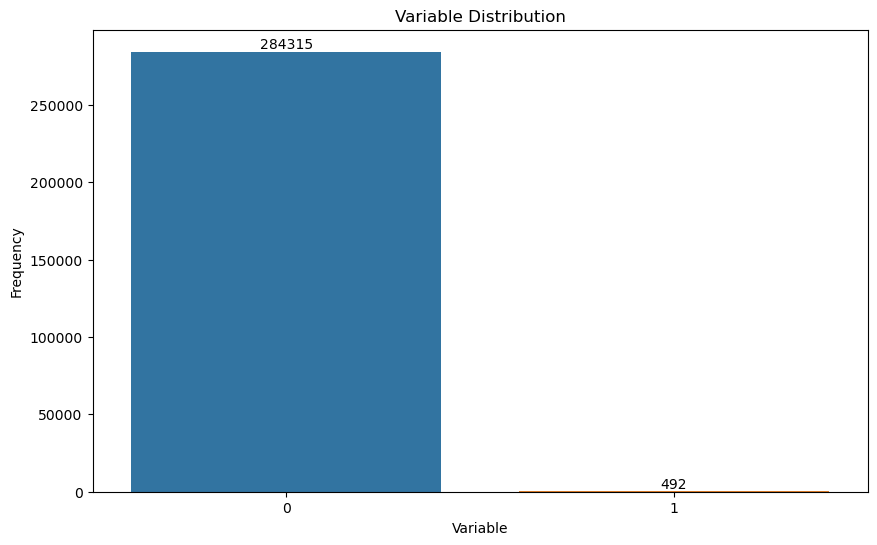

In [9]:
# Ploting Variable , Variable Distribution
plt.figure(figsize=(10,6))
ax=sns.countplot(x=df.iloc[:,-1], data=df)
for con in ax.containers:
    ax.bar_label(con,label_type="edge")
plt.title("Variable Distribution")
plt.xlabel("Variable")
plt.ylabel("Frequency")
plt.show()

In [20]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [21]:
legit.shape, fraud.shape

((284315, 31), (492, 31))

In [24]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [25]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [26]:
legit_sample = legit.sample(n=492)

In [27]:
new_df = pd.concat([legit_sample,fraud], axis=0)

In [32]:
new_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

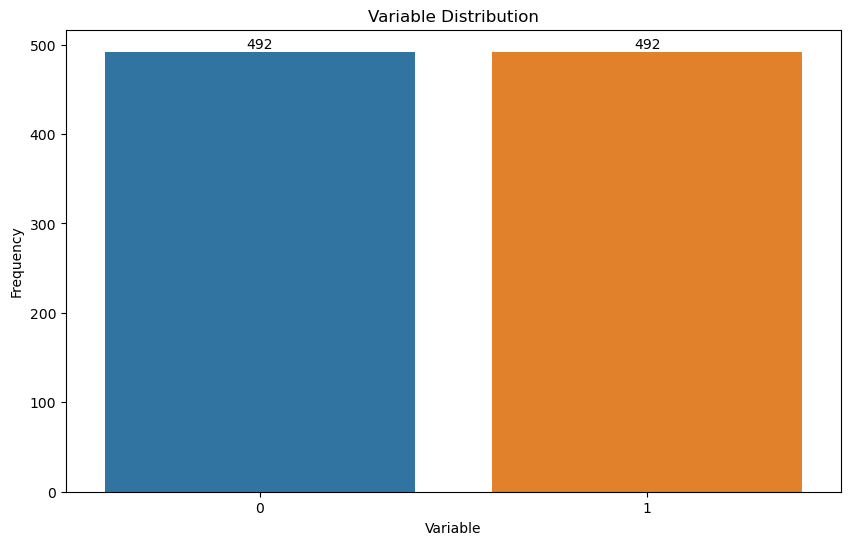

In [33]:
# Ploting Variable , Variable Distribution
plt.figure(figsize=(10,6))
ax=sns.countplot(x=new_df.iloc[:,-1], data=df)
for con in ax.containers:
    ax.bar_label(con,label_type="edge")
plt.title("Variable Distribution")
plt.xlabel("Variable")
plt.ylabel("Frequency")
plt.show()

In [34]:
print(" ----------Input Variables------------")
x=new_df.iloc[:,:-1]
display(x)

 ----------Input Variables------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
228517,145545.0,-1.336535,1.159724,1.898945,2.174665,1.410981,-0.607025,1.360146,-0.016168,-1.945194,...,-0.156754,-0.159415,-0.781628,-0.173742,0.265703,0.763792,-0.342930,-0.070968,0.056740,32.97
180404,124528.0,-0.204990,0.250261,0.493750,-0.931678,-0.055083,-0.292374,1.596036,-0.523439,0.858406,...,-0.312378,-0.085207,0.167811,-0.004097,-0.025952,-1.077740,-0.349151,-0.329905,-0.255431,130.34
48336,43595.0,1.055314,-1.890359,-0.270812,-1.646325,-1.005460,0.517737,-0.796975,-0.037869,-2.044355,...,0.354062,-0.255753,-0.989454,-0.296940,-1.407050,0.261397,-0.352632,-0.008888,0.051508,285.70
232928,147372.0,2.042814,-0.015703,-1.165502,0.319616,0.229036,-0.070429,-0.412311,-0.025176,0.867212,...,-0.014770,-0.320914,-0.773275,0.321949,-0.055885,-0.451174,0.165519,-0.008380,-0.009759,11.00
132384,79971.0,1.265905,-0.534090,-0.156842,-0.577151,-0.689313,-1.108378,-0.033168,-0.296723,-1.151016,...,0.130334,0.273396,0.608990,-0.145051,0.439710,0.646540,-0.080962,-0.024776,0.011797,73.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [35]:
#Output variable:
target_variables=new_df.iloc[:,-1]
display(target_variables)

228517    0
180404    0
48336     0
232928    0
132384    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [36]:
print("Model Parameters |  Accuracy Score  | Precision  | Recall  | F1 Score  | Classification Report")
y = target_variables
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=23)
print("Parameters:")
display(LogisticRegression())
lr=LogisticRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy Score:')
print(round(accuracy_score(y_test,y_pred)*100,2))
print('\nPrecision:')
print(round(precision_score(y_test,y_pred)*100,2))
print('\nRecall:')
print(round(recall_score(y_test,y_pred)*100,2))
print('\nF1 Score:')
print(round(f1_score(y_test,y_pred)*100,2))

Model Parameters |  Accuracy Score  | Precision  | Recall  | F1 Score  | Classification Report
Parameters:


LogisticRegression()

Accuracy Score:
92.57

Precision:
93.75

Recall:
91.22

F1 Score:
92.47


In [37]:
print('Classification Report:')
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       148
           1       0.94      0.91      0.92       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



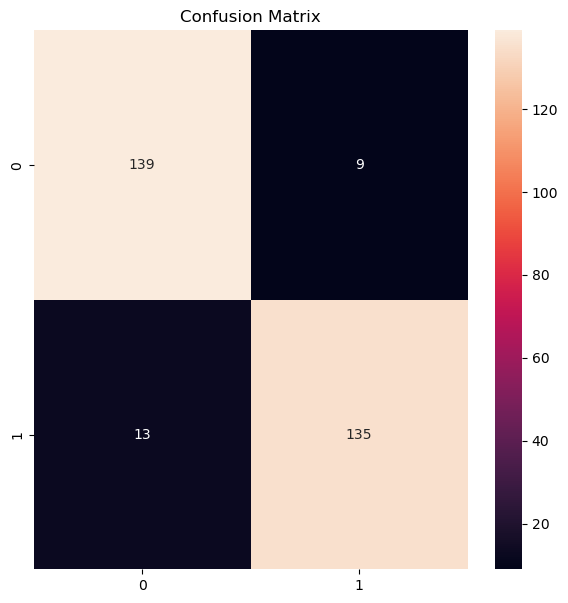

In [38]:
# Ploting confusion matrix
fig=plt.figure(figsize=(7,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

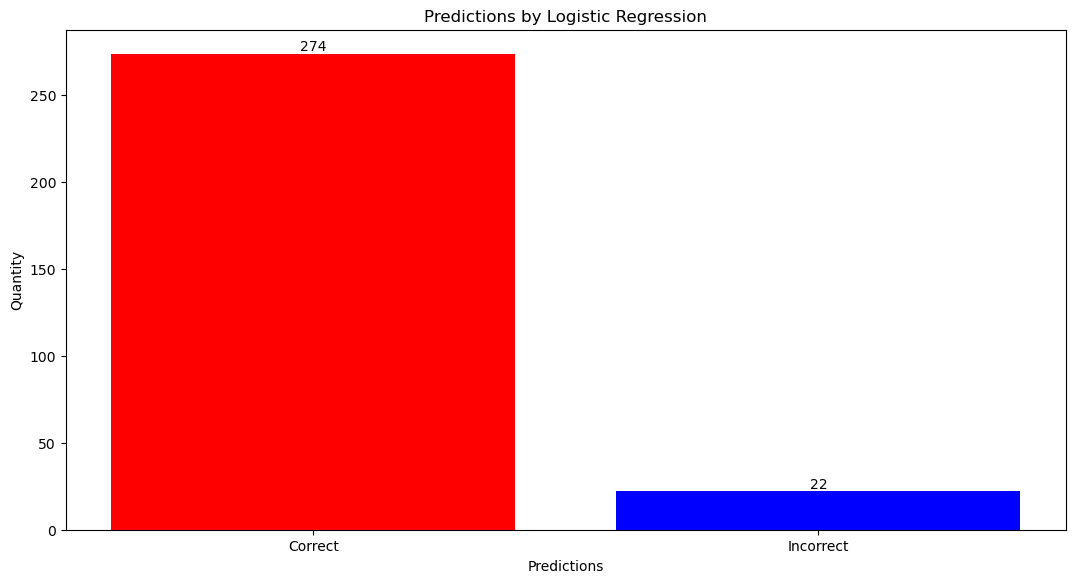

In [39]:
d=dict(Counter(list(y_pred==y_test)))
values = list(d.values())
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.bar(range(len(d)), values, tick_label=['Correct','Incorrect'],color=['red','blue'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Predictions by Logistic Regression")
plt.xlabel('Predictions')
plt.ylabel('Quantity')
plt.show()